In [1]:
# import the dependencies
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
# use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

74.83851237302673 165.39375252688097
69.42125318451096 -74.3255062892641
47.506895299673175 111.76674285772691
-45.89634884074363 72.07956148934846
-43.35499196445724 -127.69903389756493
65.26008370466778 -167.93296609333484
74.24546494763413 -36.15321047291948
-34.02290048977135 -34.27828038821386
-45.22176100659169 -92.65521097591235
59.40629061446526 -18.780825057484435
18.39581139976353 -143.06062962958669
-67.86722806477844 178.8942355617757
84.76111064713723 14.372859202176471
-81.99900617038088 132.26711851373312
-18.780843440921217 66.98212810587566
-89.1416252435971 18.54688702058462
-40.22388014310928 -80.46677498044751
-64.73030181632865 58.89306372608607
85.70710909060537 179.97736225701027
-88.49403910361868 100.99833366146987
33.14267617772437 87.05826206167654
42.07955737133216 136.1270786481429
-2.933513615535375 -137.73087638704322
-56.145353060756484 -43.16817589508659
61.04012338641647 -127.56096062548626
-13.51083686019264 67.0018577678486
-9.266283596382252 151.939

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b399f39bba312545a513d94a6c4294df


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | ondorhaan
City not found. Skipping...
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | nome
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | vestmannaeyjar
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | albany
Processing Re

Processing Record 36 of Set 4 | igrim
Processing Record 37 of Set 4 | khonuu
City not found. Skipping...
Processing Record 38 of Set 4 | pitmoaga
Processing Record 39 of Set 4 | tomatlan
Processing Record 40 of Set 4 | kiboga
Processing Record 41 of Set 4 | alofi
Processing Record 42 of Set 4 | tiznit
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | varhaug
Processing Record 45 of Set 4 | cap malheureux
Processing Record 46 of Set 4 | thompson
Processing Record 47 of Set 4 | anloga
Processing Record 48 of Set 4 | saint anthony
Processing Record 49 of Set 4 | santiago de cao
Processing Record 50 of Set 4 | bathsheba
Processing Record 1 of Set 5 | narsaq
Processing Record 2 of Set 5 | mirzapur
Processing Record 3 of Set 5 | itoman
Processing Record 4 of Set 5 | reforma
Processing Record 5 of Set 5 | halalo
City not found. Skipping...
Processing Record 6 of Set 5 | faanui
Processing Record 7 of Set 5 | latung
Processing Record 8 of Set 5 | kendari
Processing Record 9 o

Processing Record 22 of Set 8 | nalut
Processing Record 23 of Set 8 | vardo
Processing Record 24 of Set 8 | takoradi
Processing Record 25 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 26 of Set 8 | vidim
Processing Record 27 of Set 8 | matay
Processing Record 28 of Set 8 | bintulu
Processing Record 29 of Set 8 | puerto baquerizo moreno
Processing Record 30 of Set 8 | yaan
Processing Record 31 of Set 8 | opuwo
Processing Record 32 of Set 8 | polyarnyy
Processing Record 33 of Set 8 | juegang
Processing Record 34 of Set 8 | pecanha
Processing Record 35 of Set 8 | bay roberts
Processing Record 36 of Set 8 | khandbari
Processing Record 37 of Set 8 | yarada
Processing Record 38 of Set 8 | alta floresta
Processing Record 39 of Set 8 | basqal
Processing Record 40 of Set 8 | gushikawa
Processing Record 41 of Set 8 | comodoro rivadavia
Processing Record 42 of Set 8 | mutata
Processing Record 43 of Set 8 | webuye
Processing Record 44 of Set 8 | warqla
City not found. Skipping...
Processi

Processing Record 12 of Set 12 | bogo
Processing Record 13 of Set 12 | boyolangu
Processing Record 14 of Set 12 | saint-augustin
Processing Record 15 of Set 12 | aswan
Processing Record 16 of Set 12 | yatou
Processing Record 17 of Set 12 | kayerkan
Processing Record 18 of Set 12 | caravelas
Processing Record 19 of Set 12 | yazoo city
Processing Record 20 of Set 12 | poronaysk
Processing Record 21 of Set 12 | knysna
Processing Record 22 of Set 12 | nivala
Processing Record 23 of Set 12 | suhbaatar
Processing Record 24 of Set 12 | alibog
City not found. Skipping...
Processing Record 25 of Set 12 | sterling
Processing Record 26 of Set 12 | shiyan
Processing Record 27 of Set 12 | makung
City not found. Skipping...
Processing Record 28 of Set 12 | kavaratti
Processing Record 29 of Set 12 | esso
Processing Record 30 of Set 12 | vila franca do campo
Processing Record 31 of Set 12 | mikhaylovka
Processing Record 32 of Set 12 | khash
Processing Record 33 of Set 12 | hoi an
Processing Record 34 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilibino,68.0546,166.4372,11.55,96,100,4.47,RU,2022-10-10 20:48:19
1,Clyde River,70.4692,-68.5914,19.63,79,40,16.11,CA,2022-10-10 20:48:20
2,Souillac,-20.5167,57.5167,71.98,78,40,6.91,MU,2022-10-10 20:48:20
3,Rikitea,-23.1203,-134.9692,72.19,73,2,9.57,PF,2022-10-10 20:48:21
4,Nome,64.5011,-165.4064,30.27,80,100,3.44,US,2022-10-10 20:48:21
5,Tasiilaq,65.6145,-37.6368,33.96,98,100,15.35,GL,2022-10-10 20:48:22
6,Arraial Do Cabo,-22.9661,-42.0278,75.06,83,40,4.61,BR,2022-10-10 20:48:22
7,Castro,-24.7911,-50.0119,57.40,97,100,9.06,BR,2022-10-10 20:47:15
8,Vestmannaeyjar,63.4427,-20.2734,38.82,58,96,3.09,IS,2022-10-10 20:48:23
9,Hilo,19.7297,-155.0900,88.29,72,40,8.01,US,2022-10-10 20:45:51


In [12]:
# reorganize the data from columns for city_data_df
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bilibino,RU,2022-10-10 20:48:19,68.0546,166.4372,11.55,96,100,4.47
1,Clyde River,CA,2022-10-10 20:48:20,70.4692,-68.5914,19.63,79,40,16.11
2,Souillac,MU,2022-10-10 20:48:20,-20.5167,57.5167,71.98,78,40,6.91
3,Rikitea,PF,2022-10-10 20:48:21,-23.1203,-134.9692,72.19,73,2,9.57
4,Nome,US,2022-10-10 20:48:21,64.5011,-165.4064,30.27,80,100,3.44
5,Tasiilaq,GL,2022-10-10 20:48:22,65.6145,-37.6368,33.96,98,100,15.35
6,Arraial Do Cabo,BR,2022-10-10 20:48:22,-22.9661,-42.0278,75.06,83,40,4.61
7,Castro,BR,2022-10-10 20:47:15,-24.7911,-50.0119,57.40,97,100,9.06
8,Vestmannaeyjar,IS,2022-10-10 20:48:23,63.4427,-20.2734,38.82,58,96,3.09
9,Hilo,US,2022-10-10 20:45:51,19.7297,-155.0900,88.29,72,40,8.01


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1665435882.998354

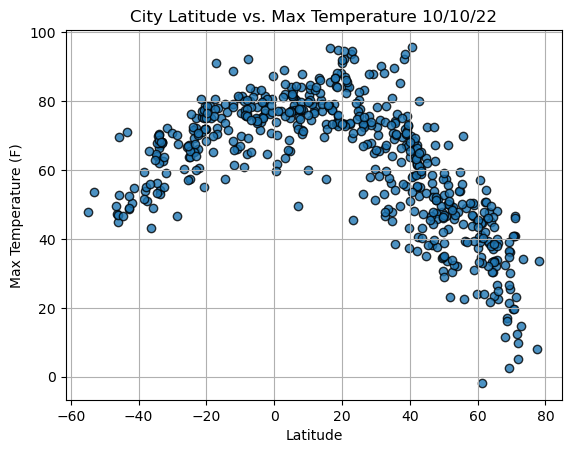

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

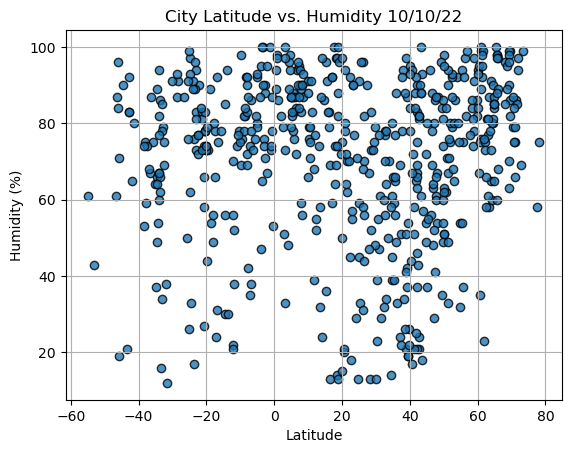

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

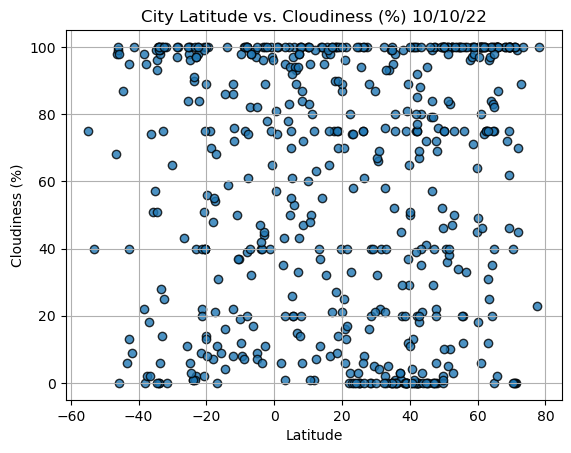

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

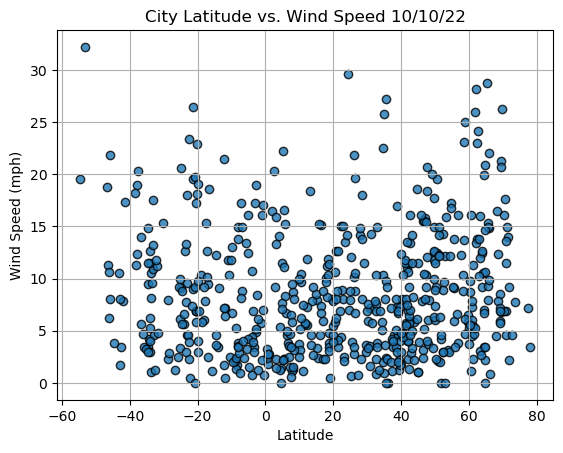

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]

index13

#  output will present all the information at index 13 of the city_data_df DataFrame

City                   Bredasdorp
Country                        ZA
Date          2022-10-10 20:48:25
Lat                      -34.5322
Lng                       20.0403
Max Temp                    63.97
Humidity                       66
Cloudiness                     96
Wind Speed                   3.44
Name: 13, dtype: object

In [28]:
# filtering city_data_df for all Northern Hemisphere latitudes, for latitudes greater than or euqal to 0 using loc method
# the return is a boolean value of true or false
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
569     True
570    False
571     True
572     True
573     True
Name: Lat, Length: 574, dtype: bool

In [30]:
# if we want it to return a dataframe with the same information as the cell above for latitudes greater than or equal to 0 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bilibino,RU,2022-10-10 20:48:19,68.0546,166.4372,11.55,96,100,4.47
1,Clyde River,CA,2022-10-10 20:48:20,70.4692,-68.5914,19.63,79,40,16.11
4,Nome,US,2022-10-10 20:48:21,64.5011,-165.4064,30.27,80,100,3.44
5,Tasiilaq,GL,2022-10-10 20:48:22,65.6145,-37.6368,33.96,98,100,15.35
8,Vestmannaeyjar,IS,2022-10-10 20:48:23,63.4427,-20.2734,38.82,58,96,3.09


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

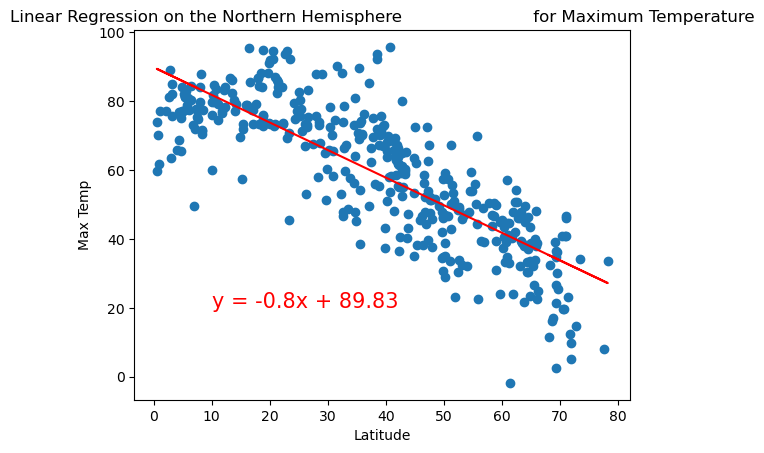

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

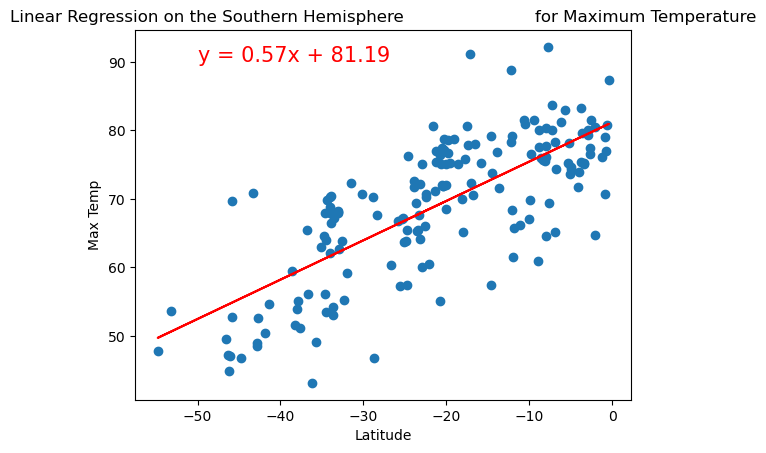

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

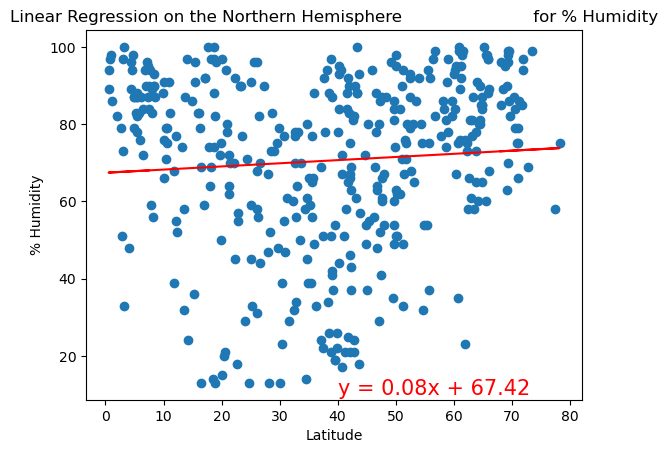

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

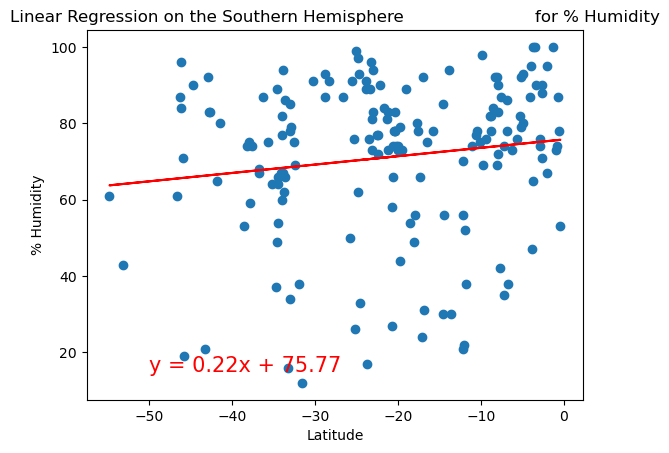

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

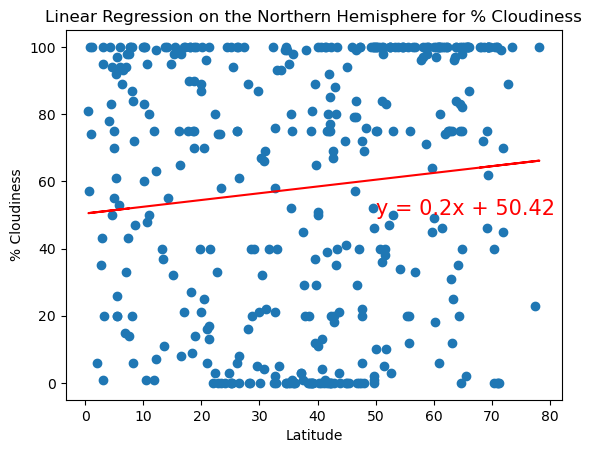

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(50,50))

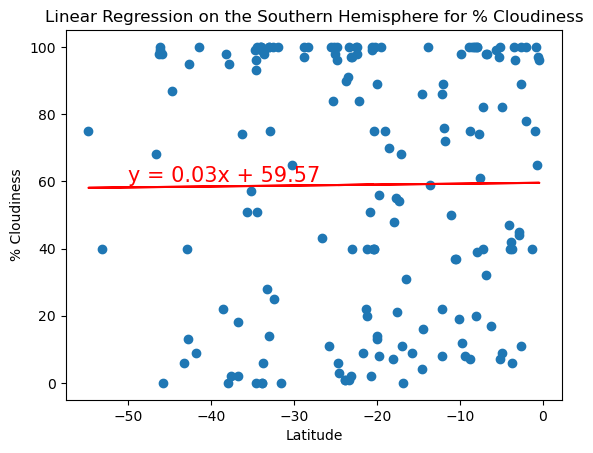

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

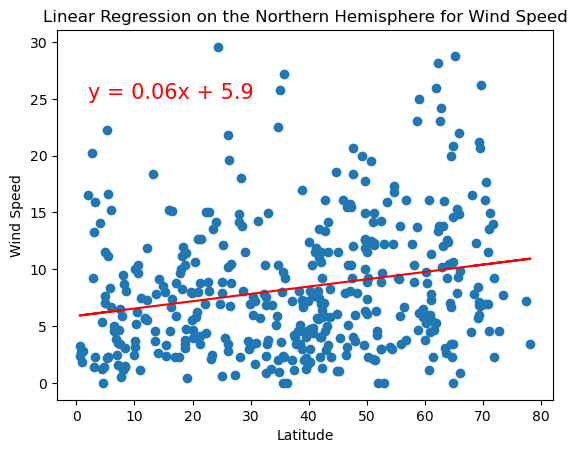

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(2,25))

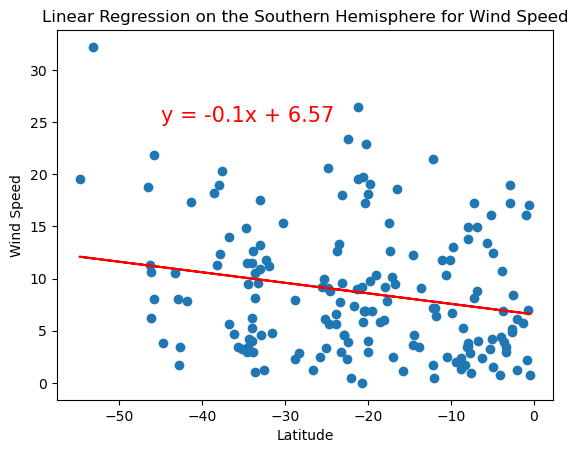

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-45,25))